In [6]:
import sqlite3

# Connect to SQLite DB (will create if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ("Mobile", 10, 250),
    ("Laptop", 5, 800),
    ("Charger", 20, 20),
    ("Headphones", 15, 60),
    ("Laptop", 3, 800),
    ("Mobile", 7, 250),
    ("Monitor", 4, 300),
    ("Keyboard", 12, 40),
    ("Mouse", 18, 25),
    ("Tablet", 6, 400),
    ("Smartwatch", 8, 150),
    ("Printer", 2, 500),
    ("Headphones", 5, 60),
    ("Keyboard", 7, 40),
    ("Mouse", 10, 25),
    ("Tablet", 3, 400),
    ("Smartwatch", 4, 150),
    ("Printer", 1, 500)
]


cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [7]:
import pandas as pd

# SQL query to summarize sales
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df


,product,total_qty,revenue
0,Charger,40,800.0
1,Headphones,35,2100.0
2,Keyboard,24,985.0
3,Laptop,21,16300.0
4,Mobile,34,8500.0
5,Monitor,6,1500.0
6,Mouse,42,1050.0
7,Printer,3,1500.0
8,Smartwatch,12,1800.0
9,Tablet,9,3600.0


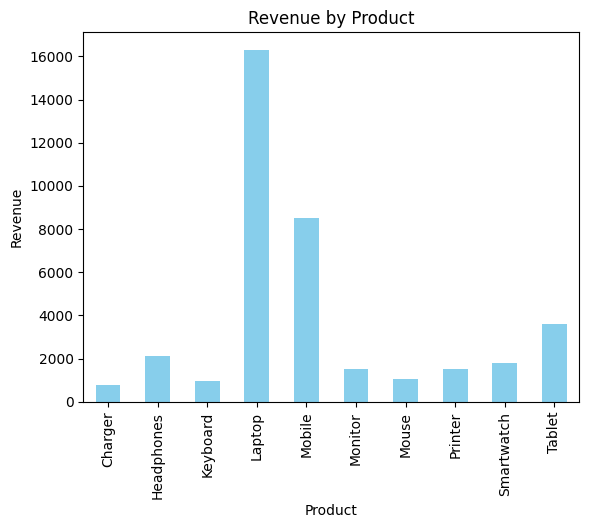

In [10]:
import matplotlib.pyplot as plt

# Plotting
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()
